In [109]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("Diabetes_dataset.csv")

# Replace 0 with NaN in specific columns (medically invalid as 0)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Check missing values after replacement
print("Missing values per column:")
print(df.isnull().sum())

# Show first 5 rows after replacement
df.head()


Missing values per column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


We have some missing values which has to be clear for ML model

In [110]:
# Impute missing values with median
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col].fillna(df[col].median(), inplace=True)

# Check again for missing values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [111]:
df.shape

(768, 9)

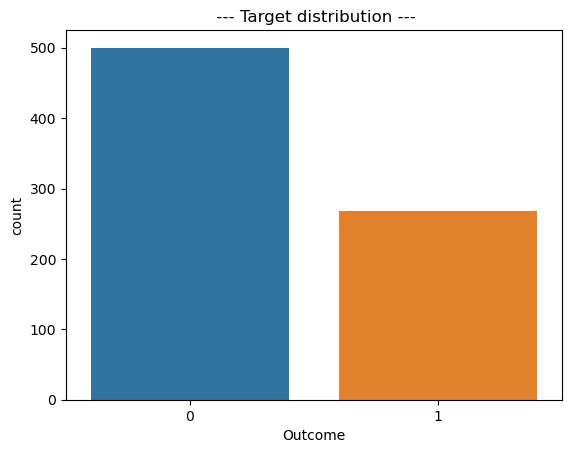



0    500
1    268
Name: Outcome, dtype: int64


In [112]:
sns.countplot(x='Outcome', data=df)
plt.title(" --- Target distribution ---")
plt.show()

print("\n")
print(df['Outcome'].value_counts())

In [113]:
px.pie(df,'Outcome',color='Outcome', color_discrete_map={'0':'red','1':'green'},
       title = "Data Distribution")

In [114]:
# Outlier Analysis:
for column in df.drop("Outcome",axis=1).columns[:5]:

    # for loop auto iterates through the first five feature columns in the dataframe

    fig = px.box(data_frame =df ,
                 x='Outcome',
                 color = 'Outcome',
                 y = column,
                 color_discrete_sequence = ["#005A75","#D4FF5C"],
                 orientation = 'v')

    fig.show()

In [115]:
for column in df.drop("Outcome",axis=1).columns[5:8]:

    # for loop auto iterates through the first five feature columns in the dataframe

    fig = px.scatter(data_frame =df ,

                 x=column,

                 color = 'Outcome',

                 color_discrete_sequence = ["#750000","#5CB6FF"],

                 orientation = 'v')

    

    

    fig.show()

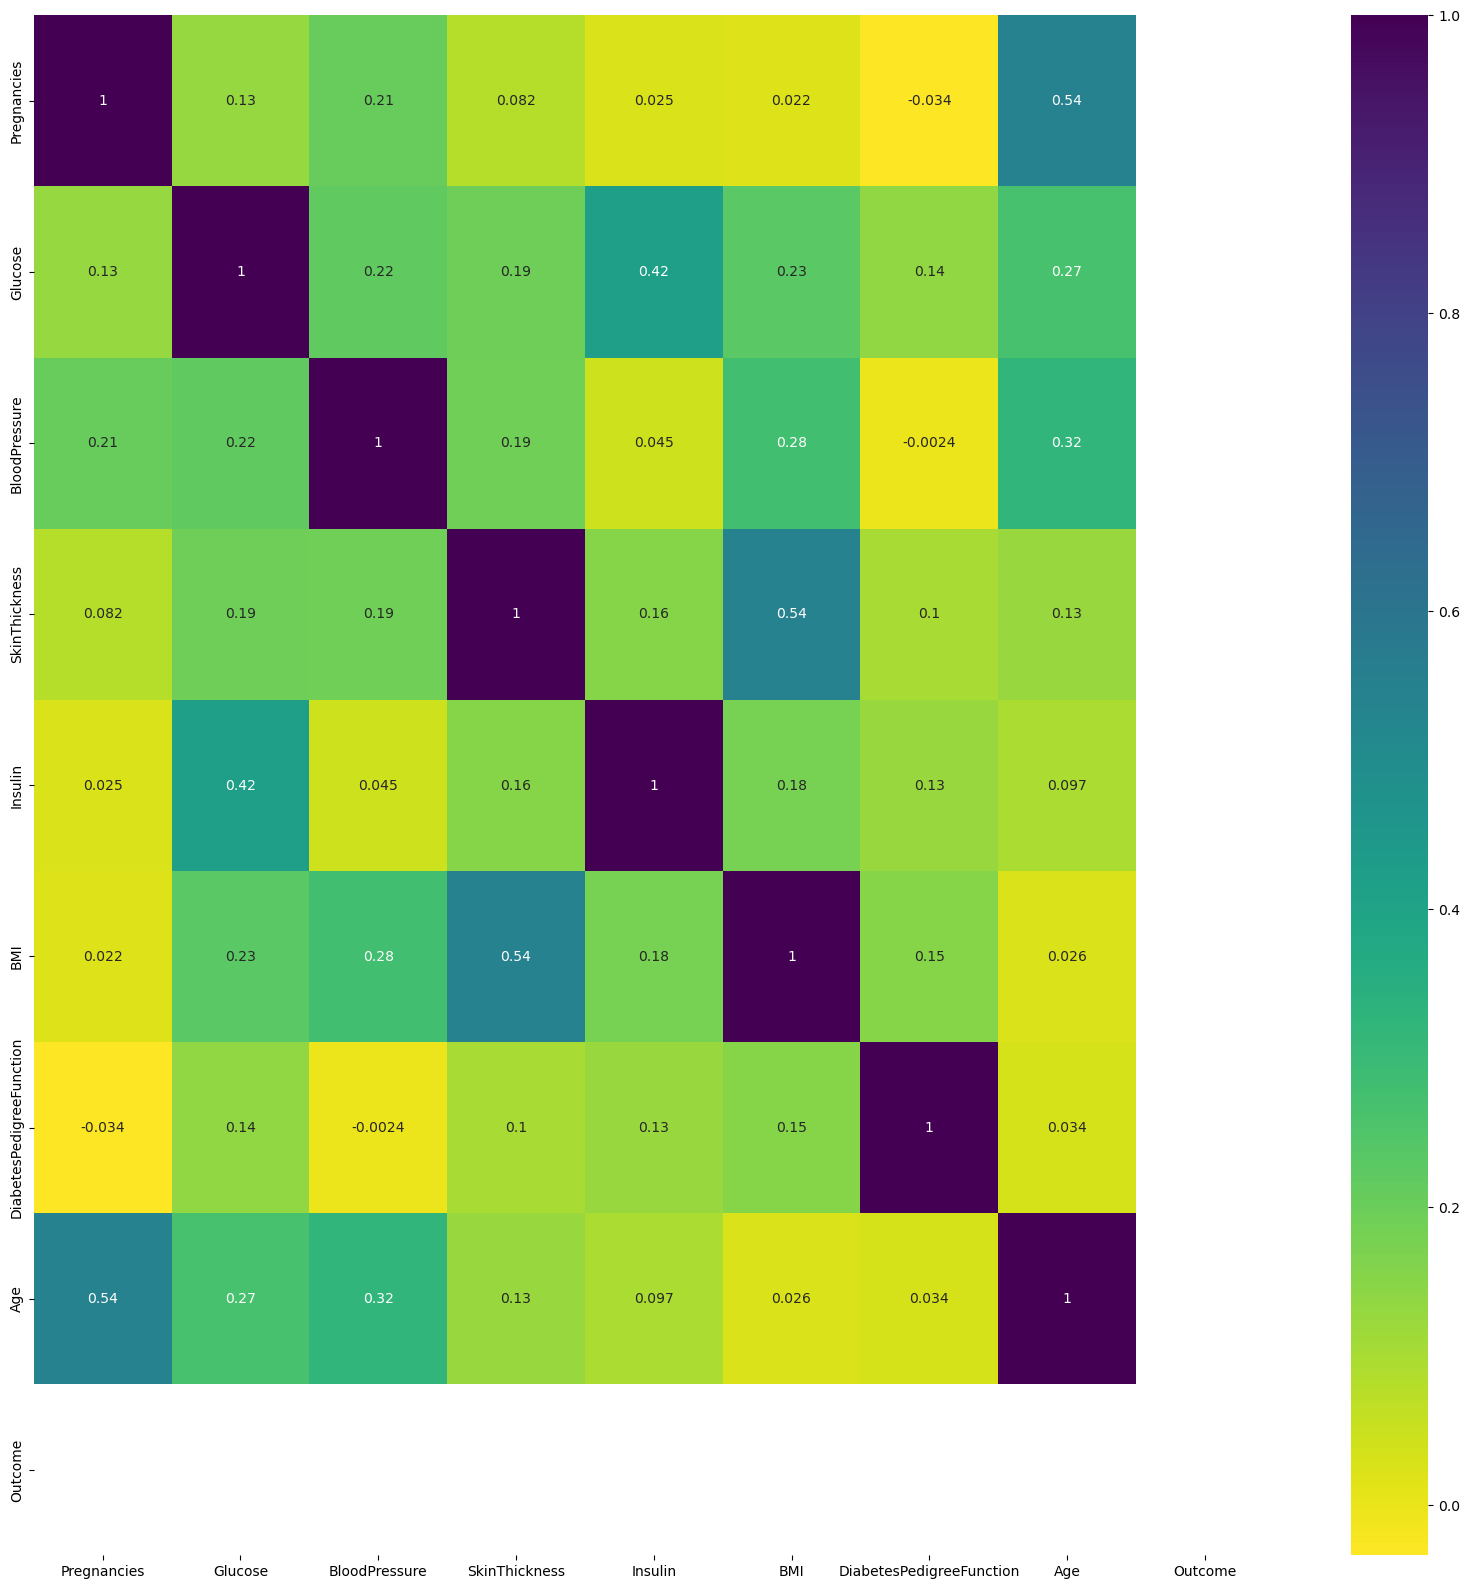

In [116]:
from matplotlib import pyplot as plt

df['Outcome'] = (df['Outcome'] == '0').astype(int)

corr = df.corr()

plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap='viridis_r' , annot=True)
plt.show()

# correlation : -1 to 1

In [117]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,NaN
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,NaN
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,NaN
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,NaN
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,NaN
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,NaN
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,NaN
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"].values.reshape(-1,1)

In [119]:
print("Input Features are: ",X.shape,"Output Label Shape is: ", y.shape)


Input Features are:  (768, 8) Output Label Shape is:  (768, 1)


In [120]:
# We need to scale

# Standardize / Z-score normalization

def scale(X):
    '''
    Parameters : numpy.ndarray
    
    Returns: numpy.ndarray
    '''
    
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    
    # Standadize
    X = (X - mean) / std
    return X

X = scale(X)

### Model Implementation

In [121]:
class Node:
    def __init__(self,feature=None, threshold=None, left=None, right=None,gain = None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

### Buiding the Decision Tree

In [122]:
import numpy as np

class DecisionTree:
    '''
    Decision Tree Classifier (from scratch).
    '''

    def __init__(self, min_samples=5, max_depth=4):
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.root = None

    def split_data(self, dataset, feature, threshold):
        left_dataset = dataset[dataset[:, feature] <= threshold]
        right_dataset = dataset[dataset[:, feature] > threshold]
        return left_dataset, right_dataset

    # Function to calculate Entropy
    def entropy(self, y):
        entropy = 0.0
        labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        for p in probabilities:
            entropy += -p * np.log2(p)
        return entropy

    def information_gain(self, parent, left, right):
        parent_entropy = self.entropy(parent)

        # Weighted average child entropy
        n = len(parent)
        weight_left = len(left) / n
        weight_right = len(right) / n
        weighted_entropy = (weight_left * self.entropy(left)) + (weight_right * self.entropy(right))

        return parent_entropy - weighted_entropy

    def best_split(self, dataset, num_samples, num_features):
        best_split = {'gain': -1, 'feature': None, 'threshold': None,
                      'left_dataset': None, 'right_dataset': None}

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)

                if len(left_dataset) > 0 and len(right_dataset) > 0:
                    parent_y = dataset[:, -1]
                    left_y = left_dataset[:, -1]
                    right_y = right_dataset[:, -1]

                    gain = self.information_gain(parent_y, left_y, right_y)

                    if gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = gain

        return best_split

    def calculate_leaf(self, y):
        y = list(y)
        return max(y, key=y.count)   # majority class

    def build_tree(self, dataset, curr_depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape

        if n_samples >= self.min_samples and curr_depth < self.max_depth:
            best_split = self.best_split(dataset, n_samples, n_features)

            if best_split["gain"] > 0:
                left_node = self.build_tree(best_split["left_dataset"], curr_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], curr_depth + 1)

                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # Leaf node
        leaf_value = self.calculate_leaf(y)
        return Node(value=leaf_value)

    def fit(self, X, y):
        # Ensure y is column vector before concatenation
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        return np.array([self.make_prediction(sample, self.root) for sample in X])

    def make_prediction(self, x, node):
        if node.value is not None:
            return node.value
        feature_value = x[node.feature]
        if feature_value <= node.threshold:
            return self.make_prediction(x, node.left)
        else:
            return self.make_prediction(x, node.right)


Evaluation

In [123]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    n_samples = X.shape[0]
    
    np.random.seed(random_state)
    
    # Shuffle the indices (not necessary)
    shuffled_indices = np.random.permutation(np.arange(n_samples))
    
    test_size = int(n_samples * test_size)
    
    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    
     # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [124]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten() # --> flatten() : A list without brackets
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred) # i want the total number where the actual and prediction is exactly the same
    return (correct_predictions / total_samples)

In [125]:
import numpy as np

def balanced_accuracy(y_true, y_pred):
    """
    Balanced accuracy for multi-class classification.
    Equivalent to sklearn.metrics.balanced_accuracy_score.
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    # Unique classes
    classes = np.unique(y_true)
    
    recalls = []
    for cls in classes:
        mask_true = (y_true == cls)
        TP = np.sum((y_true == cls) & (y_pred == cls))
        FN = np.sum((y_true == cls) & (y_pred != cls))
        
        if TP + FN == 0:
            recall = 0  # avoid div by zero
        else:
            recall = TP / (TP + FN)
        
        recalls.append(recall)
    
    # Balanced accuracy = mean recall across classes
    return np.mean(recalls)


In [126]:
from sklearn.model_selection import train_test_split

# Make sure column name is correct
print(df.columns)   # check exact spelling of 'Outcome'

# Features (all except Outcome)
X = df.drop(columns=["Outcome"])  

# Target
y = df["Outcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Train shape: (614, 8) (614,)
Test shape: (154, 8) (154,)


In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# Restrict complexity
decision_tree_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,            # limit tree depth
    min_samples_split=10,   # require more samples to split
    min_samples_leaf=5      # avoid tiny leaves
)

decision_tree_classifier.fit(X_train, y_train)
predictions = decision_tree_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.0
Balanced Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [137]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
